In [1]:
import ee
import numpy as np
import matplotlib.pyplot as plt

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=kwYy1_4OOzHGs3vkvVULJN1z_habzwtjhsLj6WZTev0&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjIwWQ7PpsyJUUOI5SWw7W3iF-3dWhihn8Xpn1wFtMsz1HlQs8Mkyw

Successfully saved authorization token.


In [41]:
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5'])

In [42]:
aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

In [43]:
Intended_portion = img.sampleRectangle(region=aoi)

In [44]:
band4 = Intended_portion.get('B4')
band5 = Intended_portion.get('B5')

# pixel -> arrays
array_band4 = np.array(band4.getInfo())
array_band5 = np.array(band5.getInfo())

In [45]:
array_ndvi = (array_band5 - array_band4) / (array_band5 + array_band4)

In [47]:
print('array size of red - band4:',array_band4.shape)
print('array size of INR - band5:',array_band5.shape)
print('array size of Ndvi:',array_ndvi.shape)

array size of red - band4: (373, 531)
array size of INR - band5: (373, 531)
array size of Ndvi: (373, 531)


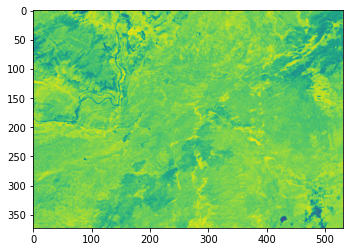

In [48]:
plt.imshow(array_ndvi)
plt.show()

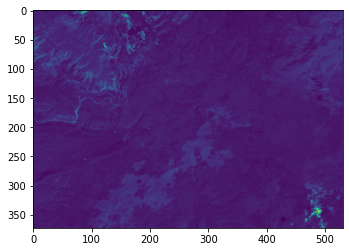

In [49]:
plt.imshow(array_band4)

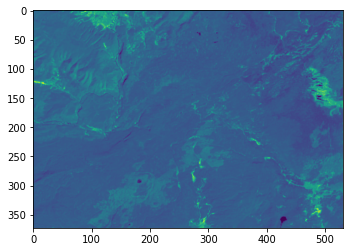

In [50]:
plt.imshow(array_band5)